# TCS_Stock_Analysis

!pip install nsepy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')
import nsepy as nse
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from datetime import date
import datetime
current_time=datetime.datetime.now()

In [3]:
tcs=nse.get_history(symbol='TCS',start=date(2010,1,1),end=date(current_time.year,current_time.month,current_time.day))

In [4]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-04,TCS,EQ,750.25,754.80,758.90,749.05,752.25,751.65,753.34,981841,7.396555e+13,NaN,570284,0.5808
2010-01-05,TCS,EQ,751.65,755.00,759.55,746.55,748.70,751.85,751.53,1007244,7.569694e+13,NaN,513287,0.5096
2010-01-06,TCS,EQ,751.85,751.85,752.20,733.00,737.00,734.85,738.35,1674588,1.236424e+14,NaN,1010023,0.6031
2010-01-07,TCS,EQ,734.85,735.50,739.40,711.00,711.85,714.40,717.63,3237446,2.323275e+14,NaN,1987073,0.6138
2010-01-08,TCS,EQ,714.40,716.00,718.50,696.50,696.50,699.80,704.68,3024089,2.131008e+14,NaN,1944945,0.6432


In [5]:
tcs.shape

(3282, 14)

In [6]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3282 entries, 2010-01-04 to 2023-03-17
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3282 non-null   object 
 1   Series              3282 non-null   object 
 2   Prev Close          3282 non-null   float64
 3   Open                3282 non-null   float64
 4   High                3282 non-null   float64
 5   Low                 3282 non-null   float64
 6   Last                3282 non-null   float64
 7   Close               3282 non-null   float64
 8   VWAP                3282 non-null   float64
 9   Volume              3282 non-null   int64  
 10  Turnover            3282 non-null   float64
 11  Trades              2927 non-null   float64
 12  Deliverable Volume  3282 non-null   int64  
 13  %Deliverble         3282 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 384.6+ KB


In [7]:
tcs.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3.282000e+03,2927.000000,3.282000e+03,3282.000000
mean,2188.487081,2189.932191,2212.793662,2165.827620,2189.328687,2189.234293,2189.447642,1.942038e+06,4.394315e+14,94070.796379,1.068753e+06,0.577281
std,796.171393,796.530488,802.501093,789.768025,796.074098,795.955076,796.123652,1.669273e+06,4.585040e+14,61673.897629,8.949995e+05,0.120741
min,699.550000,704.000000,714.000000,685.250000,696.500000,699.550000,704.680000,2.801700e+04,3.989508e+12,1219.000000,7.765000e+03,0.121400
25%,1469.437500,1467.025000,1479.387500,1451.637500,1470.212500,1469.850000,1468.190000,9.812082e+05,1.748561e+14,50194.500000,5.814850e+05,0.499225
50%,2245.000000,2244.950000,2266.850000,2218.450000,2244.000000,2245.825000,2242.435000,1.528480e+06,2.999655e+14,79245.000000,8.872240e+05,0.583700
75%,2627.637500,2630.037500,2654.100000,2601.237500,2628.750000,2628.237500,2628.420000,2.410308e+06,5.776487e+14,121925.000000,1.335648e+06,0.663575
max,4019.150000,4033.950000,4043.000000,3980.000000,4025.000000,4019.150000,4010.330000,4.403358e+07,1.268362e+16,704881.000000,3.155626e+07,0.899300


In [8]:
tcs.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                355
Deliverable Volume      0
%Deliverble             0
dtype: int64

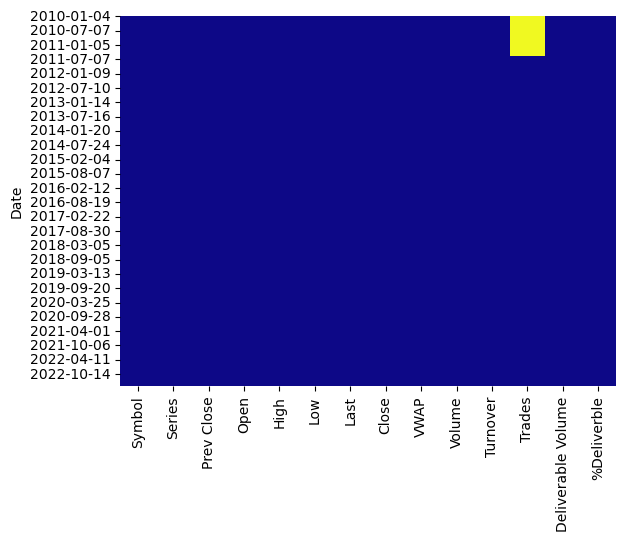

In [9]:
sns.heatmap(data=tcs.isnull(), cmap='plasma', cbar=False);

In [10]:
tcs['Trades']=tcs['Trades'].fillna(method='bfill')

In [11]:
tcs.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

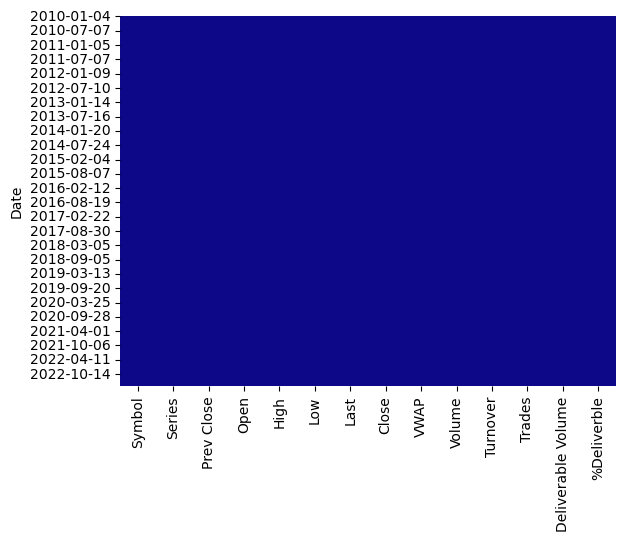

In [12]:
sns.heatmap(data=tcs.isnull(), cmap='plasma', cbar=False);

In [13]:
tcs.duplicated().sum()

3

In [14]:
tcs.drop_duplicates(inplace=True)

In [15]:
tcs.duplicated().sum()

0

In [16]:
#since 'Symbol' and 'Series' is constant value we can drop it
tcs.drop(['Symbol','Series'],axis=1,inplace=True)

# EDA

<AxesSubplot:>

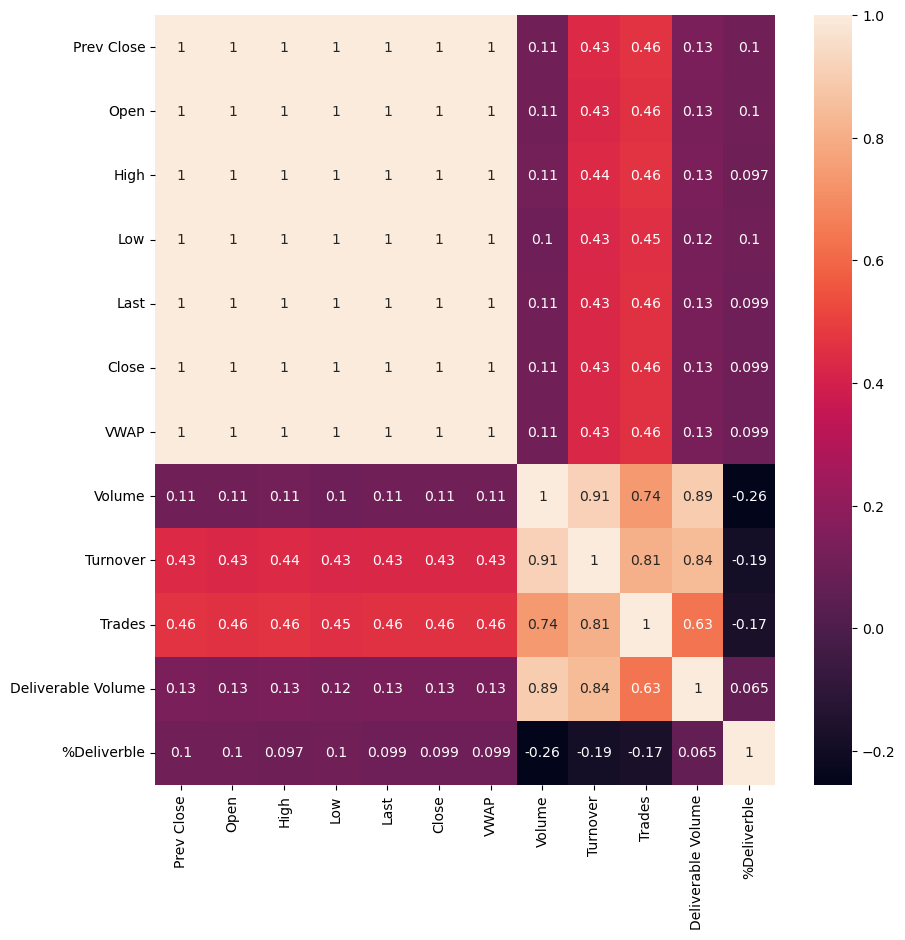

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(tcs.corr(),annot=True)

we observe from scatter plot and heat map

1.Prev Close,open,High,Low,Last,Close,VWAP is higly co related with each other.

2.Volume is highly corelated with Turnover,Deliverable Volume.

3.Trades is moderatly co related with volume,Turnover,Deliverable volume.

4.Deliverable Volume is highly co related with Volume,Turnover and moderatly with Trades.

5.%Deliverable Volume is moderatly co related with Deliverable Volume

In [18]:
#we are considering columns 
tcs=tcs[['Open','High','Low','Close']]

In [19]:
tcs.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,754.80,758.90,749.05,751.65
2010-01-05,755.00,759.55,746.55,751.85
2010-01-06,751.85,752.20,733.00,734.85
2010-01-07,735.50,739.40,711.00,714.40
2010-01-08,716.00,718.50,696.50,699.80


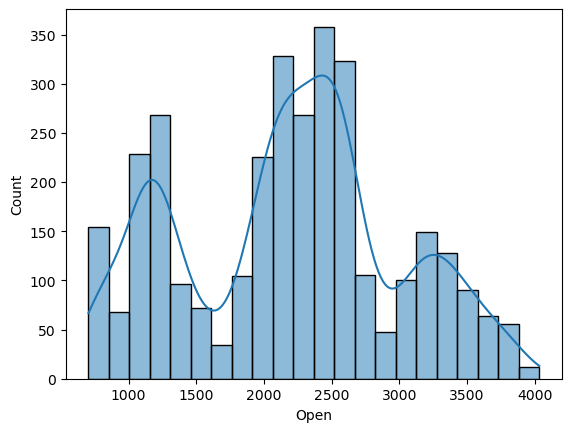

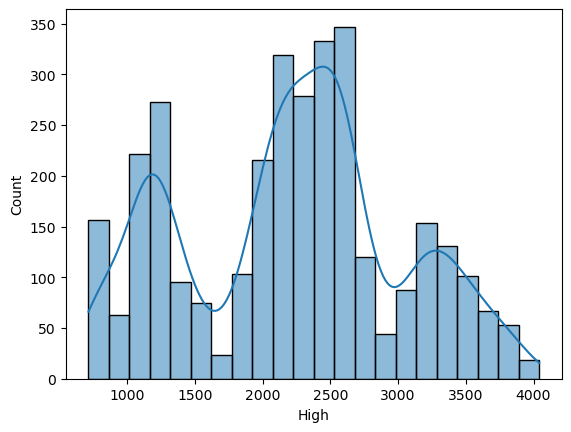

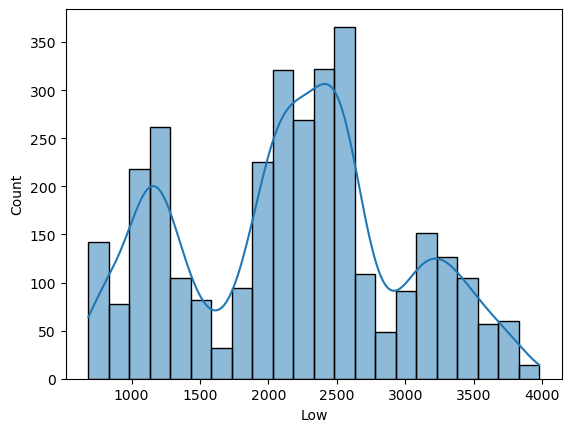

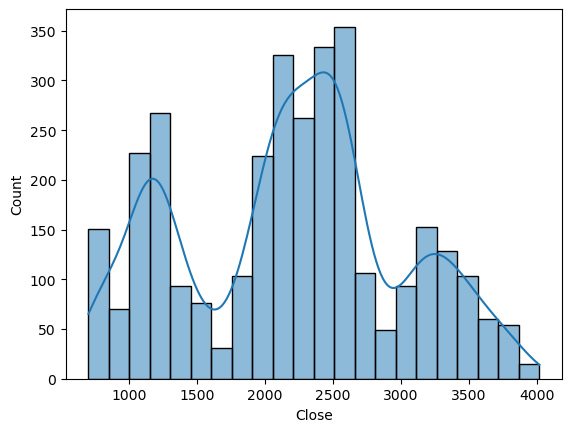

In [20]:
for i in tcs.columns:
    sns.histplot(tcs[i],kde=True)
    plt.show()

Open,High,Low,Close is not normally distributed.


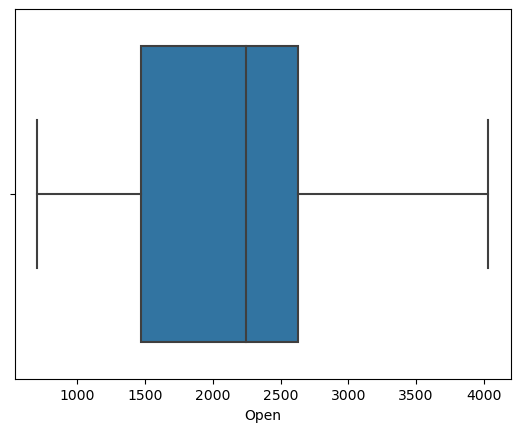

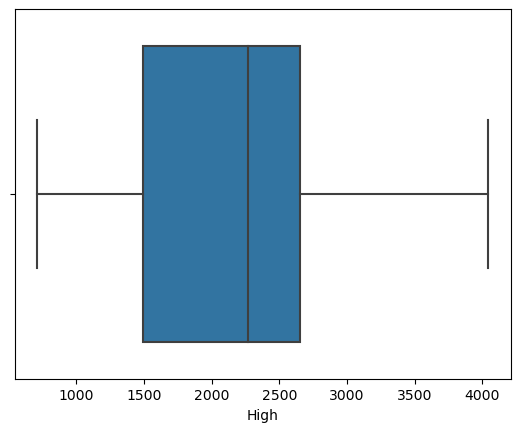

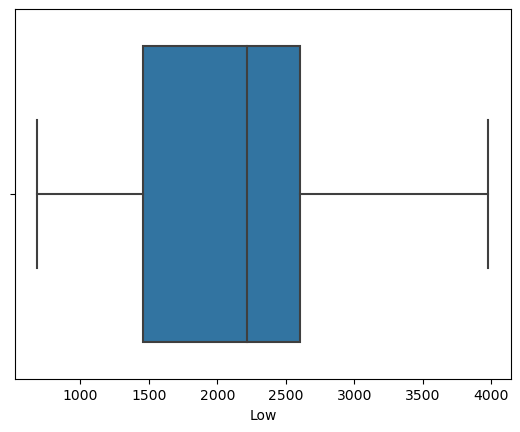

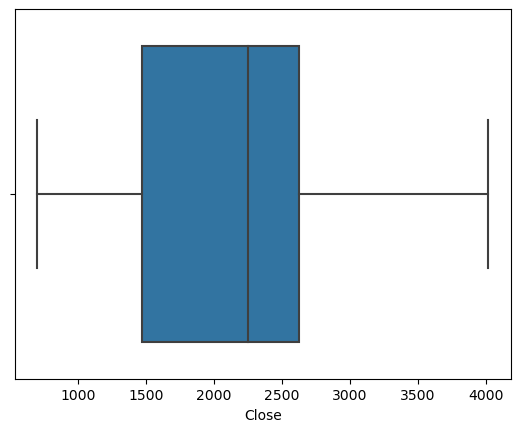

In [21]:
for i in tcs.columns:
        sns.boxplot(tcs[i])
        plt.xlabel(i)
        plt.show()

There are no outliers in Open,High,Low,Close.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

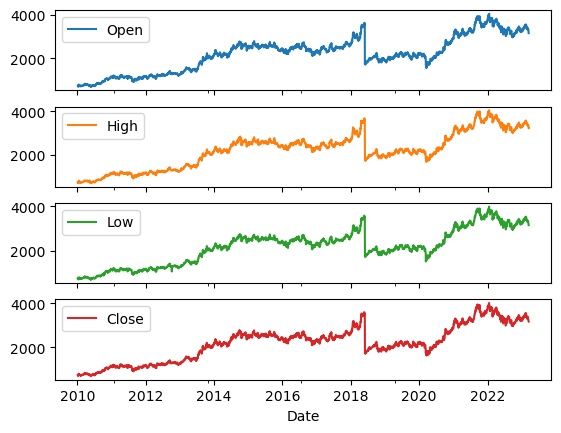

In [22]:
plt.figure(figsize=(10,10))
tcs.plot(subplots=True)

In Open,High,Low,Close we can see trend is increasing over the time.

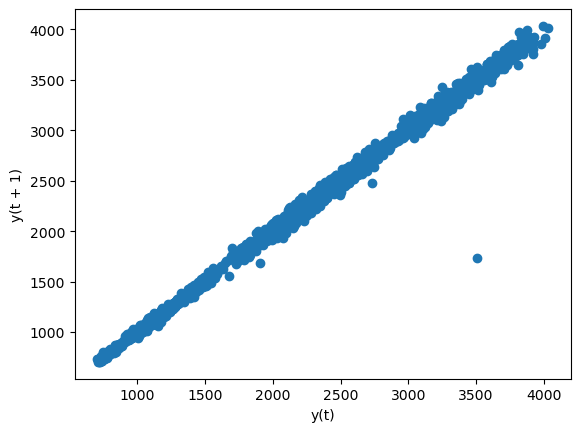

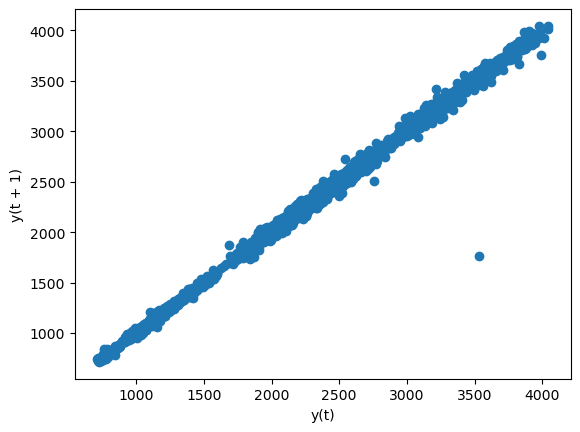

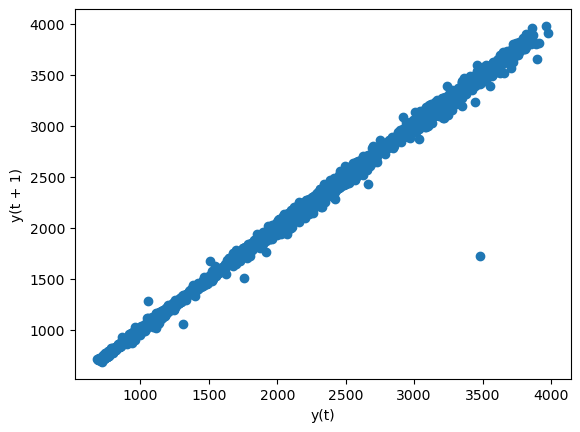

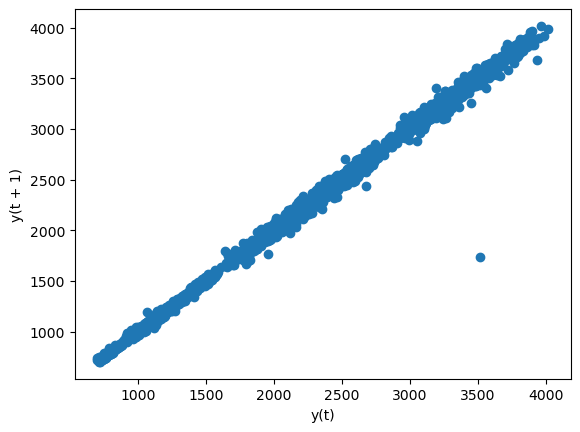

In [23]:
from pandas.plotting import lag_plot
for i in tcs.columns:
    lag_plot(tcs[i])
    plt.show()

From lag_plot,we can visualize the autocorrelation structure of the time series data.
1. In Open,High,Low,Close feature it suggests a strong positive autocorrelation.

### Time series decomposition plot

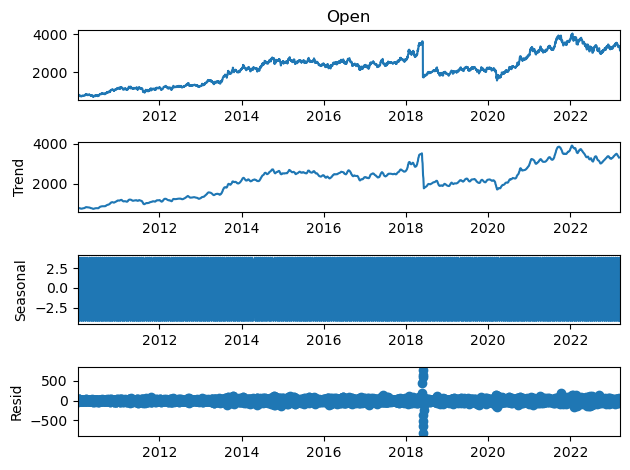

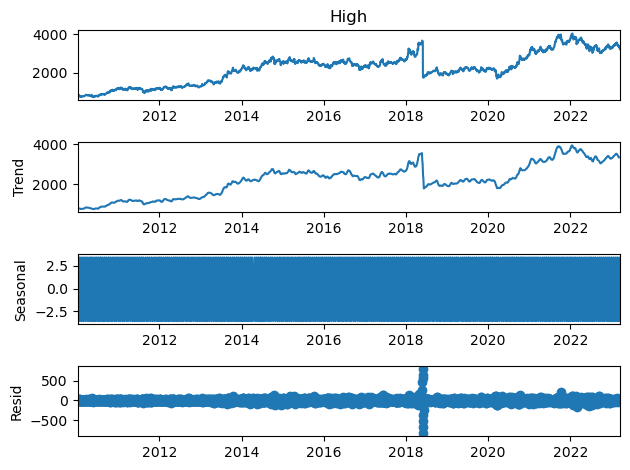

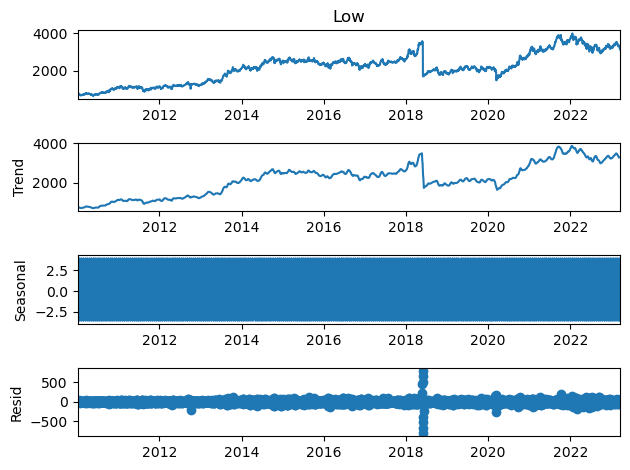

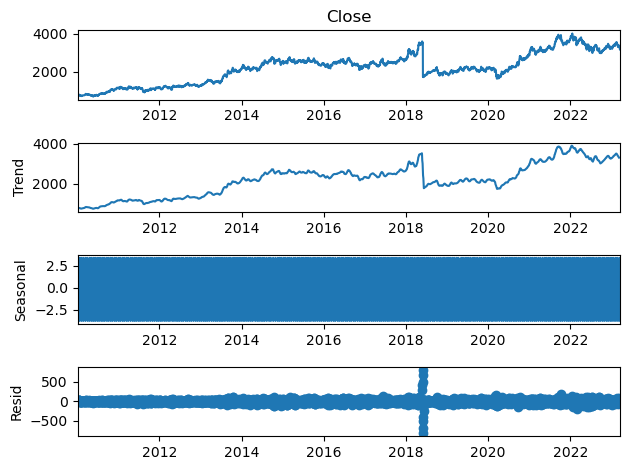

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in tcs.columns:
    decompose_ts_add = seasonal_decompose(tcs[i],period=12)
    decompose_ts_add.plot()
    plt.show()

## Pre-Processing


In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tcs)

## Train and Test data

In [26]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size,:]
test_data = scaled_data[train_size:len(scaled_data),:]

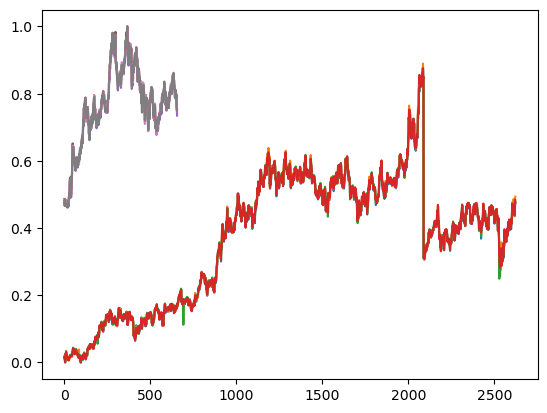

In [27]:
plt.plot(train_data)
plt.plot(test_data)

In [28]:
def create_dataset(data, time_step=1):
    X_data, y_data = [], []
    for i in range(len(data)-time_step):
        X_data.append(data[i:(i+time_step), :])
        y_data.append(data[i+time_step, :])
    return np.array(X_data), np.array(y_data)


In [29]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


## Model Building

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(4))


In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100
41/41 [==============================] - 13s 92ms/step - loss: 0.0204
Epoch 2/100
41/41 [==============================] - 3s 73ms/step - loss: 0.0017
Epoch 3/100
41/41 [==============================] - 3s 81ms/step - loss: 0.0015
Epoch 4/100
41/41 [==============================] - 3s 81ms/step - loss: 0.0015
Epoch 5/100
41/41 [==============================] - 3s 85ms/step - loss: 0.0014
Epoch 6/100
41/41 [==============================] - 4s 95ms/step - loss: 0.0013
Epoch 7/100
41/41 [==============================] - 3s 74ms/step - loss: 0.0012
Epoch 8/100
41/41 [==============================] - 3s 81ms/step - loss: 0.0011
Epoch 9/100
41/41 [==============================] - 4s 85ms/step - loss: 0.0013
Epoch 10/100
41/41 [==============================] - 4s 87ms/step - loss: 9.3570e-04
Epoch 11/100
41/41 [==============================] - 3s 76ms/step - loss: 0.0010
Epoch 12/100
41/41 [==============================] - 4s 86ms/step - loss: 0.0010
Epoch 13/100
41/41 [

In [32]:
predictions = model.predict(X_test)


19/19 [==============================] - 2s 20ms/step


In [33]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


In [34]:
predictions

array([[2682.1995, 2677.379 , 2637.5842, 2659.9211],
       [2687.067 , 2682.7607, 2642.1646, 2664.3042],
       [2642.6152, 2639.66  , 2599.033 , 2619.0981],
       ...,
       [3140.9578, 3159.8184, 3113.4773, 3120.274 ],
       [3128.1953, 3144.4395, 3101.9065, 3107.542 ],
       [3110.971 , 3126.8516, 3085.3662, 3090.7314]], dtype=float32)

In [35]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print('RMSE:', rmse)


RMSE: 91.85240963124461


last_60_days = tcs[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_pred = []
X_pred.append(last_60_days_scaled)
X_pred = np.array(X_pred)
for i in range(30):
    pred = model.predict


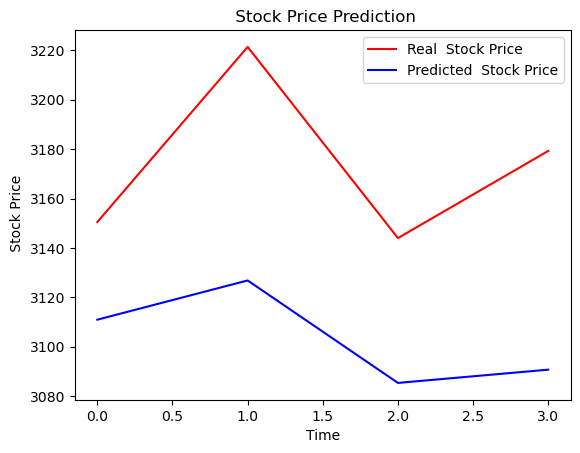

In [36]:
plt.plot(y_test[-1], color = 'red', label = 'Real  Stock Price')
plt.plot(predictions[-1], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [37]:
n_future = 30  # Number of days to forecast
n_past = 60    #Past 60 days

In [38]:
last_60_days = scaled_data[-n_past:]
X_test = np.array([last_60_days])
for i in range(n_future):
    next_day_pred = model.predict(X_test)[0, 0]
    last_60_days = np.append(last_60_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_60_days])
    print("Day {}: {}".format(i+1, scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]))

1/1 [==============================] - 0s 44ms/step
Day 1: 3085.2137259960177
1/1 [==============================] - 0s 32ms/step
Day 2: 2976.226509523392
1/1 [==============================] - 0s 26ms/step
Day 3: 2865.0378628730778
1/1 [==============================] - 0s 25ms/step
Day 4: 2763.454701519013
1/1 [==============================] - 0s 33ms/step
Day 5: 2675.6697546958926
1/1 [==============================] - 0s 26ms/step
Day 6: 2602.545905470848
1/1 [==============================] - 0s 34ms/step
Day 7: 2543.5340824127197
1/1 [==============================] - 0s 34ms/step
Day 8: 2497.271401190758
1/1 [==============================] - 0s 27ms/step
Day 9: 2461.9298002004625
1/1 [==============================] - 0s 29ms/step
Day 10: 2435.4160806417467
1/1 [==============================] - 0s 56ms/step
Day 11: 2415.614091539383
1/1 [==============================] - 0s 42ms/step
Day 12: 2400.586946320534
1/1 [==============================] - 0s 46ms/step
Day 13: 2388.70

In [39]:
import pickle

filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-20 15:24:43         3463
metadata.json                                  2023-03-20 15:24:43      

In [40]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-20 15:24:42         3463
metadata.json                                  2023-03-20 15:24:42           64
variables.h5                                   2023-03-20 15:24:42       652912
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [41]:
last_30_days = scaled_data[-n_past:]
X_test = np.array([last_30_days])
predictions = []

for i in range(n_future):
    next_day_pred = loaded_model.predict(X_test)[0, 0]
    last_30_days = np.append(last_30_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_30_days])
    pred_value = scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]
    predictions.append(pred_value)
    print("Day {}: {}".format(i+1, pred_value))


1/1 [==============================] - 2s 2s/step
Day 1: 3085.2137259960177
1/1 [==============================] - 0s 34ms/step
Day 2: 2976.226509523392
1/1 [==============================] - 0s 31ms/step
Day 3: 2865.0378628730778
1/1 [==============================] - 0s 34ms/step
Day 4: 2763.454701519013
1/1 [==============================] - 0s 28ms/step
Day 5: 2675.6697546958926
1/1 [==============================] - 0s 31ms/step
Day 6: 2602.545905470848
1/1 [==============================] - 0s 28ms/step
Day 7: 2543.5340824127197
1/1 [==============================] - 0s 27ms/step
Day 8: 2497.271401190758
1/1 [==============================] - 0s 26ms/step
Day 9: 2461.9298002004625
1/1 [==============================] - 0s 26ms/step
Day 10: 2435.4160806417467
1/1 [==============================] - 0s 26ms/step
Day 11: 2415.614091539383
1/1 [==============================] - 0s 26ms/step
Day 12: 2400.586946320534
1/1 [==============================] - 0s 28ms/step
Day 13: 2388.7044

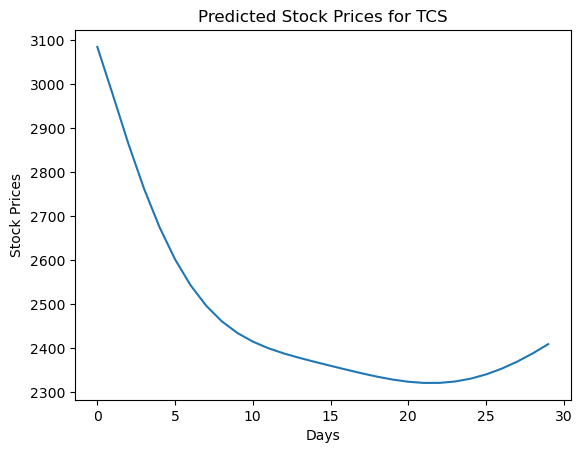

In [42]:
plt.plot(predictions,label='Close')
plt.title('Predicted Stock Prices for TCS')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.show()